### Full Preprocessing Phase
[source](https://www.kaggle.com/asura93/full-preprocessing-tutorial)

Contents

1. Load data
    - 1.1 Function to load data


In [2]:
%matplotlib widget

import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom as dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import exposure, img_as_float


from skimage import measure, morphology


Helper function for MRI slices
- Read mri (.dcm) files
- 2D visualization of MRI Scans

In [3]:

INPUT_FOLDER = "sample_CGLF/MRI_028_PRO_pCT_CGFL/"

# Load the scans in given folder path
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

##########################################################################
# Multi-slice view code extracted and adapted from: 
# https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data

def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)
                
def multi_slice_viewer(volume, eq_volume,scan_instances,title_volume, title_eq_volume, no_axis=False):
    remove_keymap_conflicts({'j', 'k'})
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
    fig.suptitle(scan_instances[0], fontsize=16)
    ax1.volume = volume
    ax1.index = len(volume) // 2
    ax1.imshow(volume[ax1.index],cmap="gray")
    ax1.set_title(title_volume)
    ax2.volume = eq_volume
    ax2.index = len(eq_volume) // 2
    ax2.imshow(eq_volume[ax2.index],cmap="gray", interpolation="bicubic")
    ax2.set_title(title_eq_volume)
    fig.canvas.mpl_connect('key_press_event', process_key)
    
            
def process_key(event):
    # Process key_press events
    fig = event.canvas.figure
    ax1 = fig.axes[0]
    ax2 = fig.axes[1]

    if event.key == 'j':
        previous_slice(ax1)
        previous_slice(ax2)
    elif event.key == 'k':
        next_slice(ax1) 
        next_slice(ax2) 
    fig.canvas.draw()

def previous_slice(ax):
    # Go to the previous slice
    volume = ax.volume
    ax.index = (ax.index-1) % len(volume)
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    # Go to the next slice
    volume = ax.volume
    ax.index = (ax.index+1) % len(volume)
    ax.images[0].set_array(volume[ax.index])

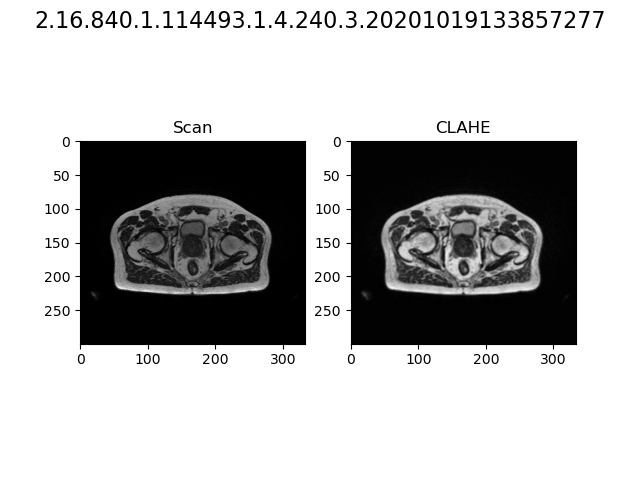

In [4]:
scans = [scan.pixel_array for scan in load_scan(INPUT_FOLDER)]
eq_scans = [exposure.equalize_adapthist(scan.pixel_array) for scan in load_scan(INPUT_FOLDER)]
scan_instances = [scan.SOPInstanceUID for scan in load_scan(INPUT_FOLDER)]




multi_slice_viewer(scans,eq_scans, scan_instances, "Scan", "CLAHE")

In [ ]:
load_scan(INPUT_FOLDER)[200].ImageOrientationPatient

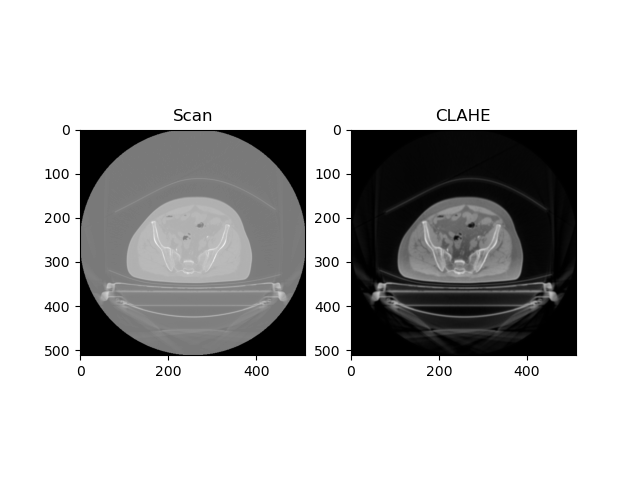

In [101]:
CT_FOLDER = "sample_CGLF/CT_028_PRO_pCT_CGFL/"
scans = [scan.pixel_array for scan in load_scan(CT_FOLDER)]
eq_scans = [exposure.equalize_adapthist(scan.pixel_array) for scan in load_scan(CT_FOLDER)]

multi_slice_viewer(scans,eq_scans, "Scan", "CLAHE")

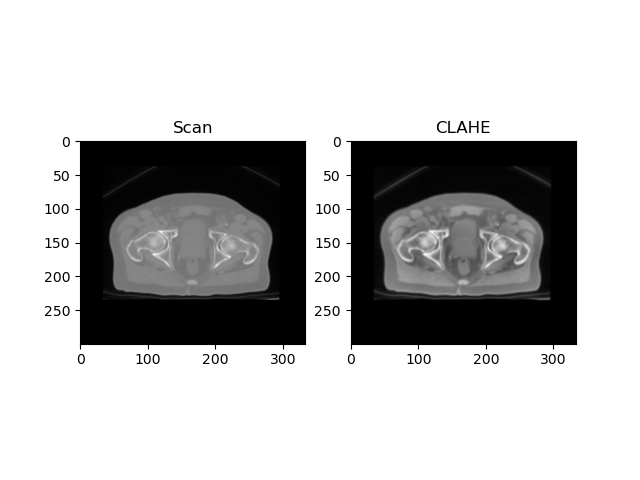

In [102]:
CT_FOLDER = "sample_CGLF/CTre_028_PRO_pCT_CGFL/"
scans = [scan.pixel_array for scan in load_scan(CT_FOLDER)]
eq_scans = [exposure.equalize_adapthist(scan.pixel_array) for scan in load_scan(CT_FOLDER)]

multi_slice_viewer(scans,eq_scans, "Scan", "CLAHE")

In [7]:
scans = [scan for scan in load_scan(INPUT_FOLDER)]


In [18]:
scans[150].SliceLocation
# Instance Creation Time              TM: '133857.79'
# -213.75

"9.75"